In [1]:
import random
     
#Generate random die
die = random.randint(1,6)
displayDie = ""
     
if die == 1:
    displayDie += "[     ]"
    displayDie += "\n|  o  |"
    displayDie += "\n[     ]"
if die == 2:
    displayDie += "[ o   ]"
    displayDie += "\n|     |"
    displayDie += "\n[   o ]"
if die == 3:
    displayDie += "[     ]"
    displayDie += "\n|o o o|"
    displayDie += "\n[     ]"
if die == 4:
    displayDie += "[o   o]"
    displayDie += "\n|     |"
    displayDie += "\n[o   o]"
if die == 5:
    displayDie += "[o   o]"
    displayDie += "\n|  o  |"
    displayDie += "\n[o   o]"
if die == 6:
    displayDie += "[o o o]"
    displayDie += "\n|     |"
    displayDie += "\n[o o o]"

print(displayDie)

[o   o]
|  o  |
[o   o]


In [2]:
#convert decimal to binary
numToGuess = bin(die).replace("0b", "")
print(numToGuess)

101


In [3]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [4]:
dieNumLen = len(numToGuess)

circuit = QuantumCircuit(dieNumLen + 1, dieNumLen)

circuit.h(dieNumLen)
circuit.z(dieNumLen)

for i in range(dieNumLen):
    circuit.h(i)
                         
circuit.barrier()
s = numToGuess[::-1]
for i in range(dieNumLen):
    if s[i] == '0':
        circuit.i(i)
    else:
        circuit.cx(i, dieNumLen)
                         
circuit.barrier()     

for i in range(dieNumLen):
    circuit.h(i)

for i in range(dieNumLen):
    circuit.measure(i, i)

In [5]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
resultCount = result.get_counts()

print(resultCount)

{'101': 1}


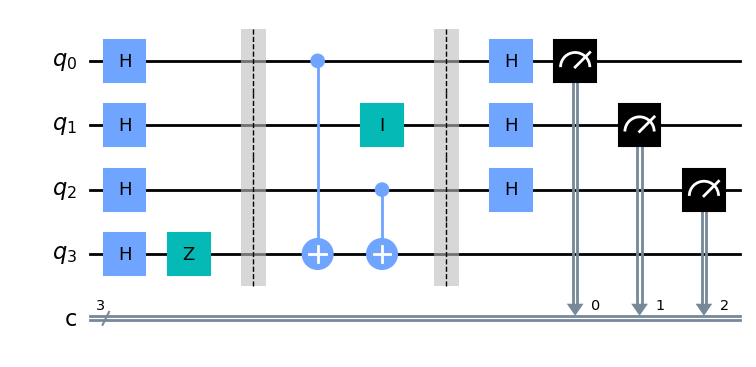

In [6]:
circuit.draw(output = 'mpl')

In [7]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [8]:
qcomp = provider.get_backend('ibmq_quito')
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


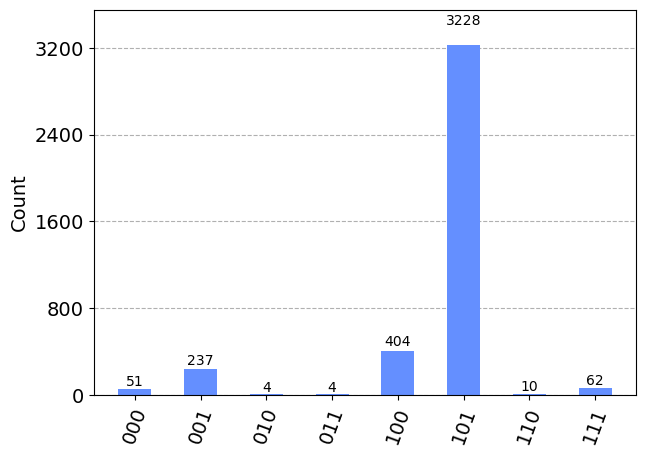

In [9]:
result = job.result()
plot_histogram(result.get_counts(circuit))

In [10]:
def classical_comp_guess(low, high, die, guessNum):
    guess = (low + high) // 2
    guessNum += 1
    if guess != die:
        if guess > die:
            high = guess
        elif guess < die:
            low = guess + 1
        classical_comp_guess(low, high, die, guessNum)
    else:
        print("Guess: ", guess)
        print("Number of guesses: ", guessNum)

guessNum = 0;
classical_comp_guess(1, 6, die, guessNum)

Guess:  5
Number of guesses:  2


In [11]:
die2 = random.randint(1,6)
displayDie += "\n"     
if die2 == 1:
    displayDie += "\n[     ]"
    displayDie += "\n|  o  |"
    displayDie += "\n[     ]"
if die2 == 2:
    displayDie += "\n[ o   ]"
    displayDie += "\n|     |"
    displayDie += "\n[   o ]"
if die2 == 3:
    displayDie += "\n[     ]"
    displayDie += "\n|o o o|"
    displayDie += "\n[     ]"
if die2 == 4:
    displayDie += "\n[o   o]"
    displayDie += "\n|     |"
    displayDie += "\n[o   o]"
if die2 == 5:
    displayDie += "\n[o   o]"
    displayDie += "\n|  o  |"
    displayDie += "\n[o   o]"
if die2 == 6:
    displayDie += "\n[o o o]"
    displayDie += "\n|     |"
    displayDie += "\n[o o o]"
    
print(displayDie)

[o   o]
|  o  |
[o   o]

[ o   ]
|     |
[   o ]


In [12]:
dice = die + die2
numToGuess = bin(dice).replace("0b", "")
print(numToGuess)

111


In [13]:
dieNumLen = len(numToGuess)

circuit = QuantumCircuit(dieNumLen + 1, dieNumLen)

circuit.h(dieNumLen)
circuit.z(dieNumLen)

for i in range(dieNumLen):
    circuit.h(i)
                         
circuit.barrier()
s = numToGuess[::-1]
for i in range(dieNumLen):
    if s[i] == '0':
        circuit.i(i)
    else:
        circuit.cx(i, dieNumLen)
                         
circuit.barrier()     

for i in range(dieNumLen):
    circuit.h(i)

for i in range(dieNumLen):
    circuit.measure(i, i)

In [14]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit, backend = simulator, shots = 1).result()
resultCount = result.get_counts()

print(resultCount)

{'111': 1}


In [15]:
job = execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


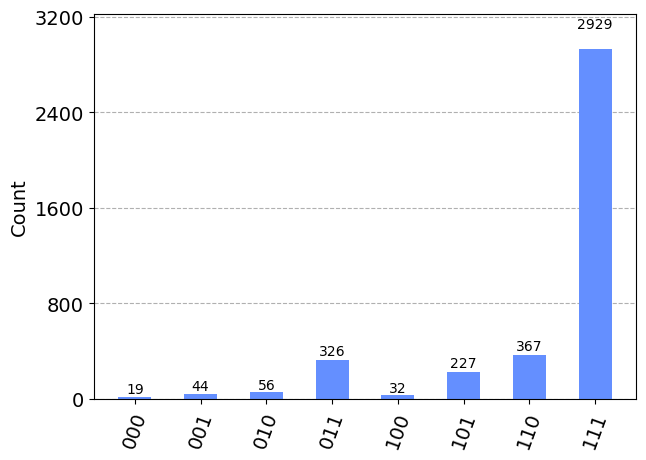

In [16]:
result = job.result()
plot_histogram(result.get_counts(circuit))

In [17]:
guessNum = 0;
classical_comp_guess(1, 12, dice, guessNum)

Guess:  7
Number of guesses:  4
